<h1>Bayesian Inference on MNIST dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

<h3>Loading train and test files</h3>

In [2]:
#load train dataset
df=pd.read_csv('C:/Users/rishd/OneDrive/Desktop/Data Cleaning DS/MNIST/MNIST_train.csv')
df

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#load test dataset
df1=pd.read_csv('C:/Users/rishd/OneDrive/Desktop/Data Cleaning DS/MNIST/MNIST_test.csv')
df1

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 787)

In [5]:
df1.shape

(10000, 787)

<h3>Dropping the first two index columns of train and test datasets</h3>

In [6]:
#dropping first two columns as they are index columns and will not be needed in the analysis
df = df.iloc[:,2:]
df

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#dropping first two columns of the test data
df1 = df1.iloc[:,2:]
df1

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Converting dataframe to a 2-D array for train and test datasets</h3>

In [8]:
#converting dataframe to an array for train data
X_train=df.to_numpy()
X_train

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [9]:
#converting dataframe to an array for test data
X_test=df1.to_numpy()
X_test

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [10]:
#Y is the target variable that is the feature label in this dataset
y_train=X_train[:,0]
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [11]:
y_train.shape

(60000,)

In [12]:
#take all features excluding the first one for train dataset
X_train = X_train[:,1:]
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
X_train.shape

(60000, 784)

In [14]:
#y for test data
y_test = X_test[:,0]
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
y_test.shape

(10000,)

In [16]:
#take all features excluding the first one for test dataset
X_test = X_test[:,1:]
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X_test.shape

(10000, 784)

<h3>Scaling train and test data</h3>

In [18]:
#scale the training and test dataset to improve accuracy
#we divide each value by 255 as there are 255 pixels 
X_train_scaled = X_train.astype(np.float32) / 255.0
X_test_scaled = X_test.astype(np.float32) / 255.0

<h3>Visualizing MNIST Dataset</h3>

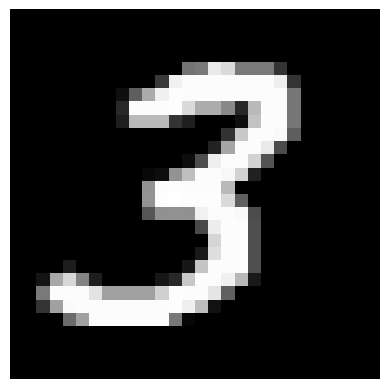

In [19]:
#img = X_train_scaled[0]           # takes first row 
#label = y_train[0]        #takes first digit 

#img = img.reshape(28, 28)          #converts single 784 vector to 28*28 matrix

#plt.imshow(img, cmap='gray')
#plt.title(f"Label: {label}")
#plt.axis('off')
#plt.show()


def show_me(X):
    plt.imshow(X.reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.show()
    
show_me(X_train_scaled[135])

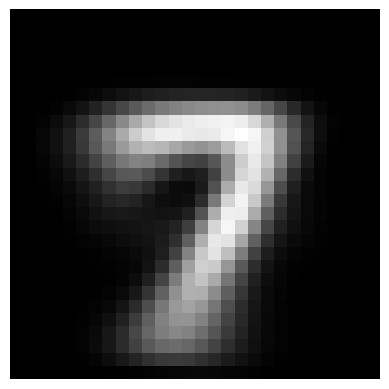

In [20]:
#average of all sevens in the dataset

def show_me_all_mean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))

show_me_all_mean(X_train_scaled,y_train,7)   

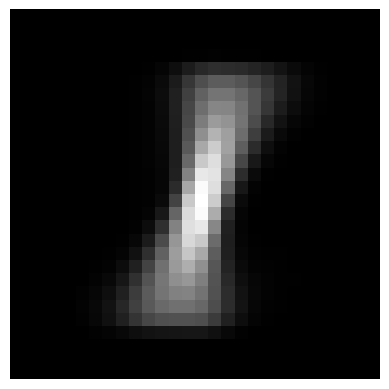

In [21]:
#average of all ones in the dataset

def show_me_all_mean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))

show_me_all_mean(X_train_scaled,y_train,1)   

<h3>Naives Bayes Classifier</h3>

In [22]:
class GaussNB():      #contains methods and variables
    def fit(self,X,y,epsilon=1e-1):                      #hyper paramter tuned to 1e-1, added to variance to prevent division by zero
        self.likelihoods=dict()          #stores mean and var
        self.priors=dict()               #stores prior probbilities    

        self.K = set(y.astype(int))         #stores labels as unique digits from 0-9

        for k in self.K:
            X_k = X[y==k]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+epsilon}        #P(X|y)
            self.priors[k] = len(X_k)/len(X)                  #P(y)



    def predict(self,X):
        N,D = X.shape
        p_hat = np.zeros((N,len(self.K)))           #needs to be a tuple

        for k,l in self.likelihoods.items():
            p_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"]) + np.log(self.priors[k])            #log (X|y)*P(y) =  log P(X|y)+log P(y)  

        return p_hat.argmax(axis=1)          #returns index of highest posterior probability

In [23]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [24]:
gnb = GaussNB()

In [25]:
#fit the model on train data
gnb.fit(X_train_scaled,y_train)

In [26]:
#make predictions on the test data
y_hat = gnb.predict(X_test_scaled)

In [27]:
#compare accuracies of predicted and actual test data labels
accuracy(y_test,y_hat)    

np.float64(0.7791)

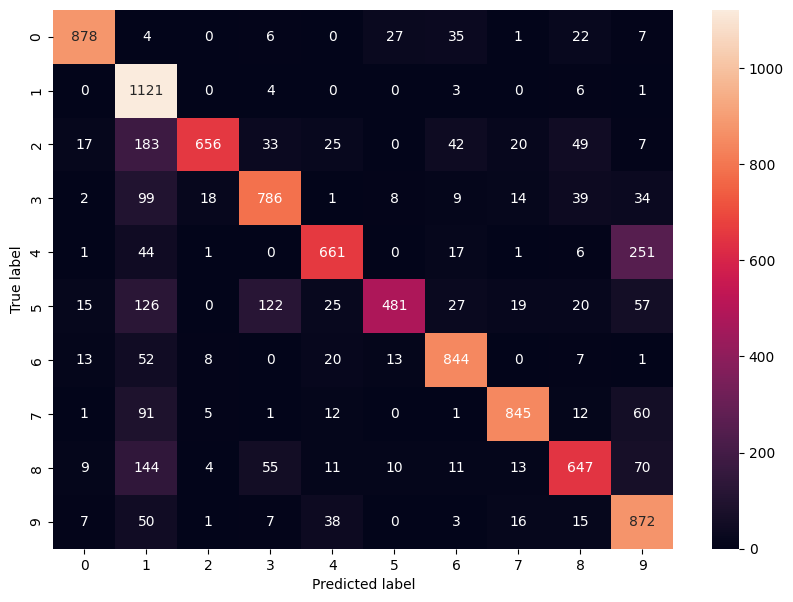

In [28]:
#confusion matrix for model evaluation
def ConfusionMatrix(y_actual,y_predicted):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y_actual, name='Actual')
  y_pred = pd.Series(y_predicted, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)                       #creates a pivot table that tells us how y_yest and y_hat relate with each other
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


ConfusionMatrix(y_test,y_hat)


<h3>Non-Naive Bayes Classifier</h3>

In [29]:
class GaussBayes():
   
  def fit(self, X, y, epsilon=1e-3):                  #fit method

    self.likelihoods =dict()                         #likelihood probability
    self.priors = dict()                              #prior probability

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": mu_k,
                             "cov":(1/(N_k-1)) * np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)}          #compute covariance
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):                               #predict method
    N, D = X.shape
    P_hat =np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])                           #posterior probability

    return P_hat.argmax(axis=1) 

In [30]:
#fit the model on train dataset
gbays = GaussBayes()
gbays.fit(X_train_scaled,y_train)

In [31]:
#predict the model on the test dataset
y_hat_bayes = gbays.predict(X_test_scaled)

In [32]:
accuracy(y_test,y_hat_bayes)

np.float64(0.9108)

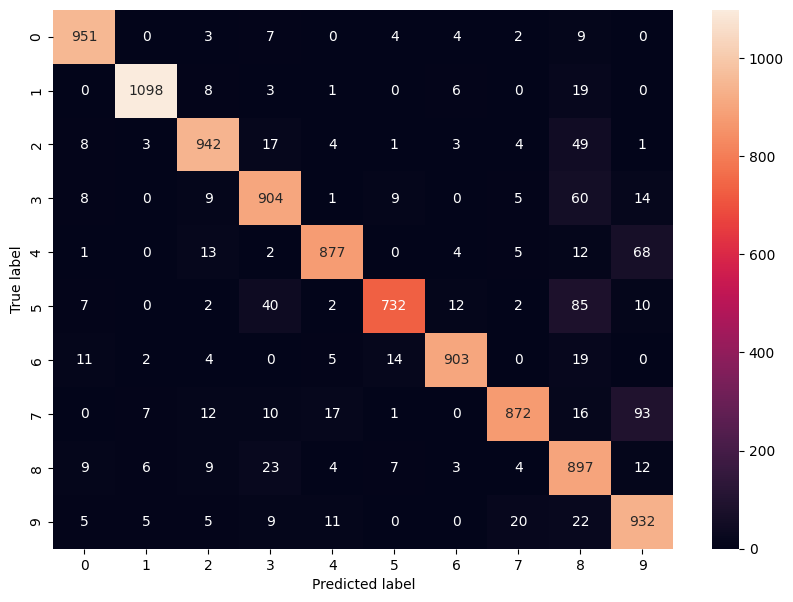

In [33]:
#confusion matrix for model evaluation
def ConfusionMatrix(y_actual,y_predicted):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y_actual, name='Actual')
  y_pred = pd.Series(y_predicted, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


ConfusionMatrix(y_test,y_hat_bayes)

<h3>KNN Classifier</h3>

In [ ]:
#not included in the ppt as non-naive bayes model performed well on MNIST dataset

In [34]:
class KNNClassifier():
    
    def fit(self,X,y):
        self.X = X
        self.y = y

    def predict(self,X,K,epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2,axis=1)      #not taking sqrt cz it is a slow process
            idxt = np.argsort(dist2)[:K]             #returns sorted indices of nearest neighbors
            gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
            
            y_hat[i] = np.bincount(self.y[idxt],weights=gamma_k).argmax()

        return y_hat
            

In [35]:
knn_instance =  KNNClassifier()
knn_instance.fit(X_train_scaled,y_train)

In [36]:
y_hat_knn = knn_instance.predict(X_test_scaled,K=20)

In [37]:
accuracy(y_test,y_hat_knn)

np.float64(0.9633)

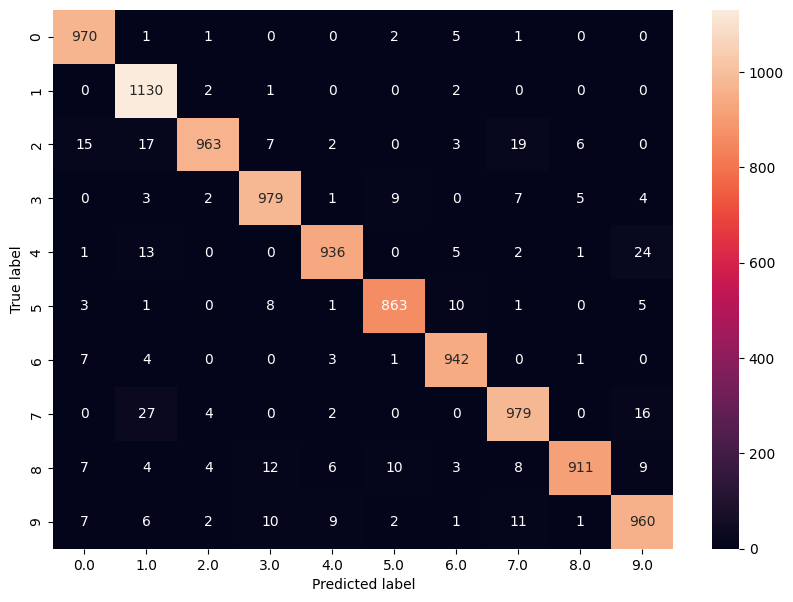

In [38]:
#confusion matrix
def ConfusionMatrix(y_actual,y_predicted):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y_actual, name='Actual')
  y_pred = pd.Series(y_predicted, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


ConfusionMatrix(y_test,y_hat_knn)